In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import (Input, Dense, 
                          Conv2D, AveragePooling2D, GlobalAveragePooling2D, Dropout)
from keras.optimizers import Adam
import shutil
import keras.backend as K
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import random
#####################################
import sys
sys.path.insert(0, 'HelperFiles')
from HelperFunctions import *
#####################################

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-05-07 18:09:10.416887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:09:12.325018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 18:09:12.347104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 18:09:12.347323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_nod

In [2]:
datasetPath = "../../datasets"

In [3]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

# Split Into Training and Testing
directory = f"{datasetPath}/spectrograms3sec/train/"
for g in genres:
  if len(os.listdir(os.path.join(f'{datasetPath}/spectrograms3sec/test/',f"{g}"))) == 0:
    filenames = os.listdir(os.path.join(directory,f"{g}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]

    for f in test_files:

      shutil.move(directory + f"{g}"+ "/" + f,f"{datasetPath}/spectrograms3sec/test/" + f"{g}")

# Split Into Training and Validation
directory = f"{datasetPath}/spectrograms3sec/train/"
for g in genres:
  if len(os.listdir(os.path.join(f'{datasetPath}/spectrograms3sec/valid/',f"{g}"))) == 0:
    filenames = os.listdir(os.path.join(directory,f"{g}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]

    for f in test_files:

      shutil.move(directory + f"{g}"+ "/" + f,f"{datasetPath}/spectrograms3sec/valid/" + f"{g}")

In [4]:
train_dir = f"{datasetPath}/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(128,130),color_mode="rgba",class_mode='categorical',batch_size=128)

test_dir = f"{datasetPath}/spectrograms3sec/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(128,130),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
validation_dir = f"{datasetPath}/spectrograms3sec/valid/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(128,130),color_mode='rgba',class_mode='categorical',batch_size=128)

def GenreModel(input_shape = (128,130, 4),classes=10):
  X_input = Input(input_shape)

  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X_input)

  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X)
  X = AveragePooling2D(pool_size=(3, 3), strides=(2,2),padding="same")(X)
  
  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X)
  X = AveragePooling2D(pool_size=(3, 3), strides=(2,2),padding="same")(X)

  X = Conv2D(512, kernel_size=(4,4), activation='relu',padding="valid")(X)
  X = GlobalAveragePooling2D()(X)

  X = Dense(256, activation='relu')(X)
  X = Dropout(0.5)(X)
  X = Dense(128, activation='relu')(X)
  X = Dropout(0.5)(X)
  X = Dense(10, activation='softmax')(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

Found 1000 images belonging to 10 classes.


In [6]:
# checkpoint_path = "saved_cnn3/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=False,
#                                                 verbose=1)

model = GenreModel(input_shape=(128,130, 4), classes=10)
opt = Adam()
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])

2023-05-07 18:09:13.189215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:09:13.190990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 18:09:13.191425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 18:09:13.191742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_nod

In [7]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 130, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 128, 256)     9472      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 126, 256)     590080    
                                                                 
 average_pooling2d (AverageP  (None, 62, 63, 256)      0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 61, 256)       590080    
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 31, 256)      0         
 ePooling2D)                                            

In [8]:
fresh_model = True

from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("saved/saved_cnn21_3.hdf5", save_best_only=True, monitor="val_loss", mode="min")
model_history = model.fit_generator(train_generator,epochs=100,validation_data=vali_generator, callbacks=[mc])

# if os.path.exists("../saved/saved_cnn15_3.h5"):
#     model_history = keras.models.load_model("../saved/saved_cnn15_3.h5")
# else:
#     model_history = model.fit_generator(train_generator,epochs=200,validation_data=vali_generator)
#     # model.save("../saved/saved_cnn14_3.h5")
#     fresh_model = True


/tmp/ipykernel_179335/2473570807.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_generator,epochs=100,validation_data=vali_generator, callbacks=[mc])


Epoch 1/100


2023-05-07 18:09:14.461857: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34078720 exceeds 10% of free system memory.
2023-05-07 18:09:15.526633: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34078720 exceeds 10% of free system memory.
2023-05-07 18:09:16.080136: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34078720 exceeds 10% of free system memory.
2023-05-07 18:09:16.464018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-05-07 18:09:25.974877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 2/63 [..............................] - ETA: 20s - loss: 2.3444 - accuracy: 0.0859  

2023-05-07 18:09:29.792044: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34078720 exceeds 10% of free system memory.


 3/63 [>.............................] - ETA: 25s - loss: 2.3291 - accuracy: 0.0833

2023-05-07 18:09:30.274639: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34078720 exceeds 10% of free system memory.


63/63 [==============================] - 54s 629ms/step - loss: 2.2263 - accuracy: 0.1475 - val_loss: 2.0895 - val_accuracy: 0.2070
Epoch 2/100
63/63 [==============================] - 34s 536ms/step - loss: 2.1237 - accuracy: 0.1979 - val_loss: 2.1095 - val_accuracy: 0.2020
Epoch 3/100
63/63 [==============================] - 33s 523ms/step - loss: 2.1019 - accuracy: 0.2031 - val_loss: 2.0496 - val_accuracy: 0.2300
Epoch 4/100
63/63 [==============================] - 34s 537ms/step - loss: 2.0102 - accuracy: 0.2476 - val_loss: 1.7872 - val_accuracy: 0.3210
Epoch 5/100
63/63 [==============================] - 34s 534ms/step - loss: 1.8422 - accuracy: 0.3041 - val_loss: 1.7380 - val_accuracy: 0.3340
Epoch 6/100
63/63 [==============================] - 34s 529ms/step - loss: 1.7597 - accuracy: 0.3400 - val_loss: 1.6568 - val_accuracy: 0.3790
Epoch 7/100
63/63 [==============================] - 34s 532ms/step - loss: 1.7529 - accuracy: 0.3419 - val_loss: 1.7231 - val_accuracy: 0.3620
Epoc

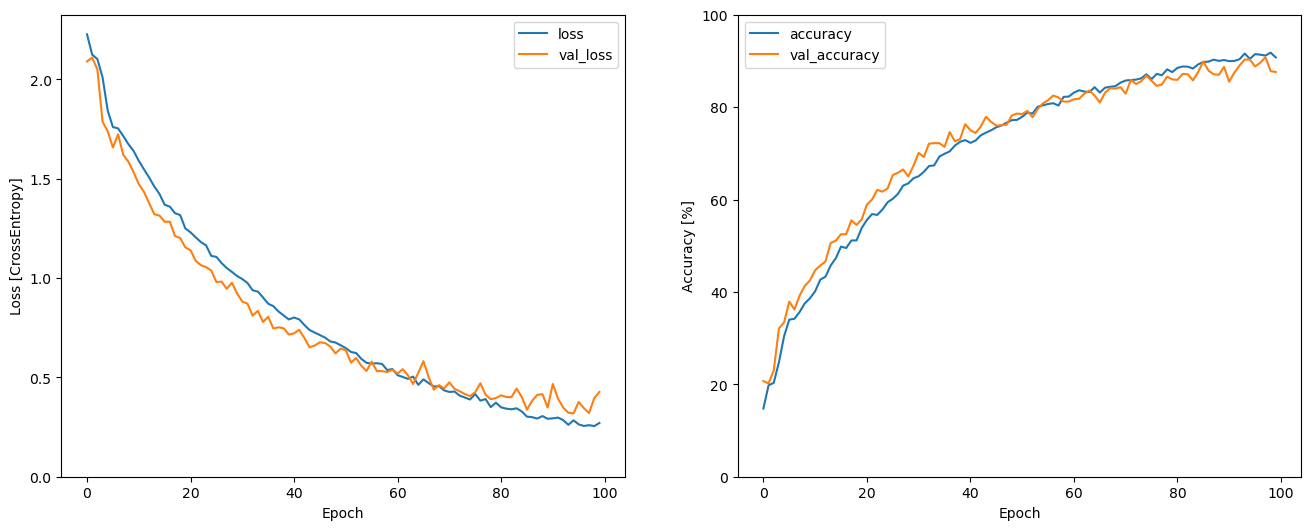

In [9]:
if fresh_model:
    metrics = model_history.history
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(model_history.epoch, metrics['loss'], metrics['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.ylim([0, max(plt.ylim())])
    plt.xlabel('Epoch')
    plt.ylabel('Loss [CrossEntropy]')

    plt.subplot(1,2,2)
    plt.plot(model_history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
    plt.legend(['accuracy', 'val_accuracy'])
    plt.ylim([0, 100])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy [%]')